In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_excel("bank-additional-full.xlsx")


In [4]:
#importation de la dataset
dataset = pd.read_excel("bank-additional-full.xlsx")

In [5]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
col=dataset.columns
col

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [44]:
dropX="age"

In [45]:
dataset=dataset.drop(dropX, axis=1)

In [46]:
dataset.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [47]:
# Gestion des NaN 
dataset.isnull().any()

job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [48]:
nbcol=len(dataset.columns)
nbl=len(dataset)
nbcol


20

In [49]:
dataset.shape

(41188, 20)

In [50]:
# Séparation des X & y 
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [51]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [52]:
X.shape

(41188, 19)

In [53]:
# Gestion des variables catégoriques 
X = pd.get_dummies(X, drop_first = True) 


In [54]:
y = pd.get_dummies(y, drop_first = True)

In [55]:
y

,yes
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [56]:
X.shape

(41188, 52)

In [58]:
test=X.columns

In [59]:
# Normalisation des X
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [60]:
sc_X.fit_transform(X)

array([[ 0.01047142, -0.56592197,  0.1954139 , ..., -0.4960667 ,
         0.39770593, -0.1857    ],
       [-0.42150051, -0.56592197,  0.1954139 , ..., -0.4960667 ,
         0.39770593, -0.1857    ],
       [-0.12451981, -0.56592197,  0.1954139 , ..., -0.4960667 ,
         0.39770593, -0.1857    ],
       ...,
       [-0.26722482, -0.20490853,  0.1954139 , ..., -0.4960667 ,
         0.39770593, -0.1857    ],
       [ 0.70856893, -0.56592197,  0.1954139 , ..., -0.4960667 ,
         0.39770593, -0.1857    ],
       [-0.07438021,  0.15610492,  0.1954139 , ..., -0.4960667 ,
        -2.51442063, -0.1857    ]])

In [61]:
X = sc_X.fit_transform(X)

In [62]:
# Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2)

In [63]:
# Application du modèle 
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\jrala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jrala\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
# Evaluation du modèle 
print("Train score : {}".format(classifier.score(X_train, y_train)))

print("Test score : {}".format(classifier.score(X_test, y_test)))

Train score : 0.9123216995447648
Test score : 0.9095654285020636


In [65]:
# Matrice de confusion 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, classifier.predict(X_test))
cm

array([[7126,  221],
       [ 524,  367]], dtype=int64)

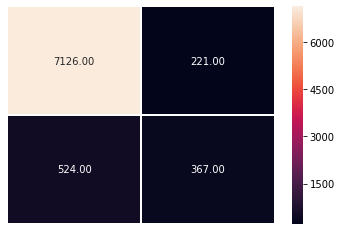

In [68]:
# Visualisation via Seaborn 
import matplotlib.pyplot as plt
    
import seaborn as sns
sns.heatmap(cm, annot=True, annot_kws={"size": 10}, fmt=".2f", linewidths=1, xticklabels=False, yticklabels=False)


In [69]:
a=cm[0,0]/(cm[0,0]+cm[1,0])
b=cm[0,1]/(cm[0,1]+cm[1,1])
c=cm[1,0]/(cm[1,0]+cm[0,0])
d=cm[1,1]/(cm[1,1]+cm[0,1])
cm2=([a,b],[c,d])
cm2

([0.9315032679738562, 0.3758503401360544],
 [0.06849673202614379, 0.6241496598639455])

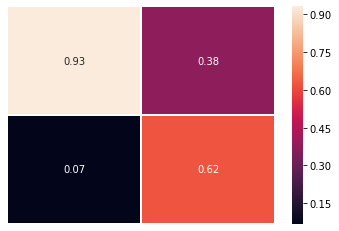

In [70]:
sns.heatmap(cm2, annot=True, annot_kws={"size": 10}, fmt=".2f", linewidths=1, xticklabels=False, yticklabels=False)

In [71]:
classifier.coef_.squeeze()

array([ 1.22029289e+00, -1.06185426e-01, -1.72094621e-01, -9.61015954e-03,
       -2.49680533e+00,  1.13011425e+00,  7.32193535e-02,  4.98218294e-01,
        2.77690163e-01, -9.20834025e-02, -2.51688693e-02,  4.52990652e-03,
       -1.92472204e-02,  6.05642957e-02, -2.94211433e-02, -1.65893087e-02,
        3.46500736e-02, -1.71554249e-02, -2.62718828e-04, -1.36083601e-02,
        2.82896271e-02,  3.81340998e-02,  4.26332687e-03,  1.86343360e-02,
        1.36498786e-02,  3.56509768e-02,  1.96355557e-02,  7.05779842e-02,
        1.24880881e-01,  4.92890388e-02, -1.46482512e-01,  2.66322601e-02,
       -4.85455063e-03, -3.83536539e-03, -4.85455063e-03, -4.20743562e-02,
       -2.56536054e-01,  2.81844972e-01,  2.03904349e-02,  7.41627606e-02,
       -1.44087360e-01,  2.24785443e-01, -2.45280119e-01, -1.14489362e-01,
        2.26622138e-02,  4.26302518e-02, -4.18161357e-02,  2.45512035e-02,
        5.41922554e-02,  6.88147669e-02,  1.63897479e-01,  1.82269184e-01])

In [72]:
test

Index(['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'

In [73]:
# Feature importance 
pd.DataFrame({"Features":test,
              "Values": classifier.coef_.squeeze()})

,Features,Values
0,duration,1.220293
1,campaign,-0.106185
2,pdays,-0.172095
3,previous,-0.009610
4,emp.var.rate,-2.496805
5,cons.price.idx,1.130114
6,cons.conf.idx,0.073219
7,euribor3m,0.498218
8,nr.employed,0.277690
9,job_blue-collar,-0.092083
